# Pytorch로 딥러닝 제대로 배우기-기초
## Part4: 데이터(Datasets & DataLoaders)
### 필수 라이브러리 Import

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### 1. 데이터 로딩

#### (1) Fashion-MNIST

- Fashion-MNIST는 10개 카테고리에서 70,000개의 패션 제품의 28×28 그레이스케일 이미지로 구성된 데이터 세트
- 카테고리당 7,0000개의 이미지
- 훈련 세트: 60,000개, 테스트 세트: 10,000개

In [2]:
# 데이터 로드
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



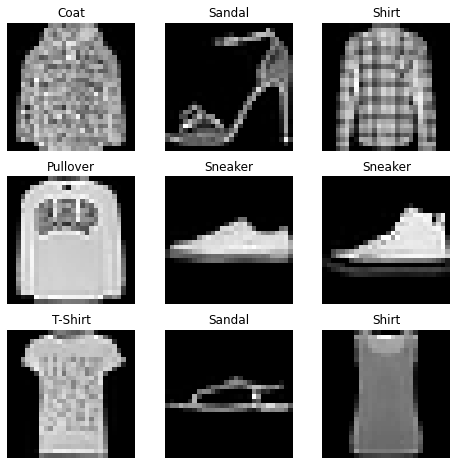

In [3]:
# 시각화
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### (2) Cifar10

- CIFAR-10 데이터셋은 Tiny Images 데이터셋의 하위 집합이며 60000개의 32x32 컬러 이미지로 구성
- 이미지는 10개의 상호 배타적인 클래스 중 하나로 표시되어 있습니다: 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭 
- 총 학습데이터: 6000개의 이미지,  학습데이터: 5000개, 테스트 데이터:1000개

In [4]:
# 데이터 로드 - Cifar 10
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


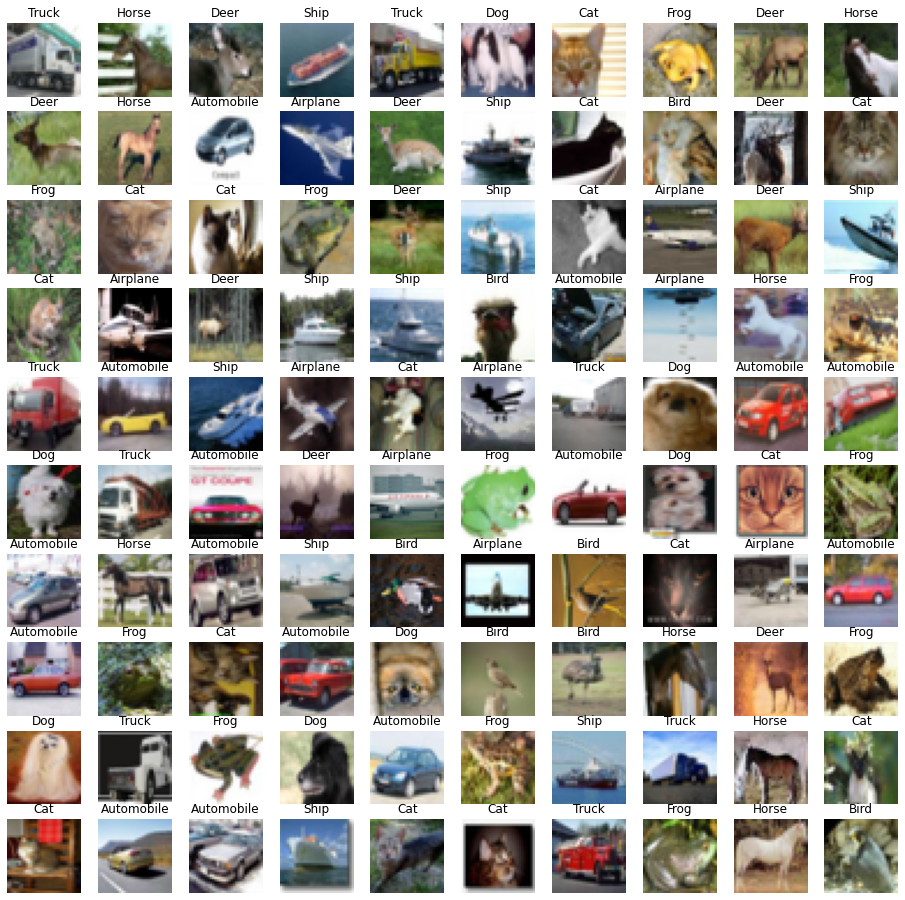

In [5]:
# 시각화
labels_map = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",
}
figure = plt.figure(figsize=(16, 16))
cols, rows = 10, 10
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    # IMPORTANT!!
    # PyTorch의 ToTensor transform은 channel first 방식임으로 채널을 마지막으로 배치해야 함
    # 자세한 내용은 다음 강좌에서 설명
    img = img.permute(1, 2, 0)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

#### (3) Cifar-100

- 100개의 클래스가 각각 600개의 이미지 포함
- 이미지 크기는 Cifar-10과 동일
- 각 클래스 별로 500개의 훈련 이미지와 100개의 테스트 이미지가 있습니다. 
- CIFAR-100의 100개의 클래스는 20개의 슈퍼 클래스로 그룹화
- 각 이미지에는 "fine" 라벨과 "coarse" 라벨(그것이 속한 슈퍼클래스)이 함께 제공

In [6]:
# Meta를 호출하는 함수
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [7]:
# 데이터 로드 - Cifar 100
training_data = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [8]:
# 시각화
mata_file = r'/content/data/cifar-100-python/meta'
meta_data = unpickle(mata_file)
print("Fine Label Names:", meta_data['fine_label_names'] )

print("Coarse Label Names:", meta_data['coarse_label_names'] )

Fine Label Names: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whal

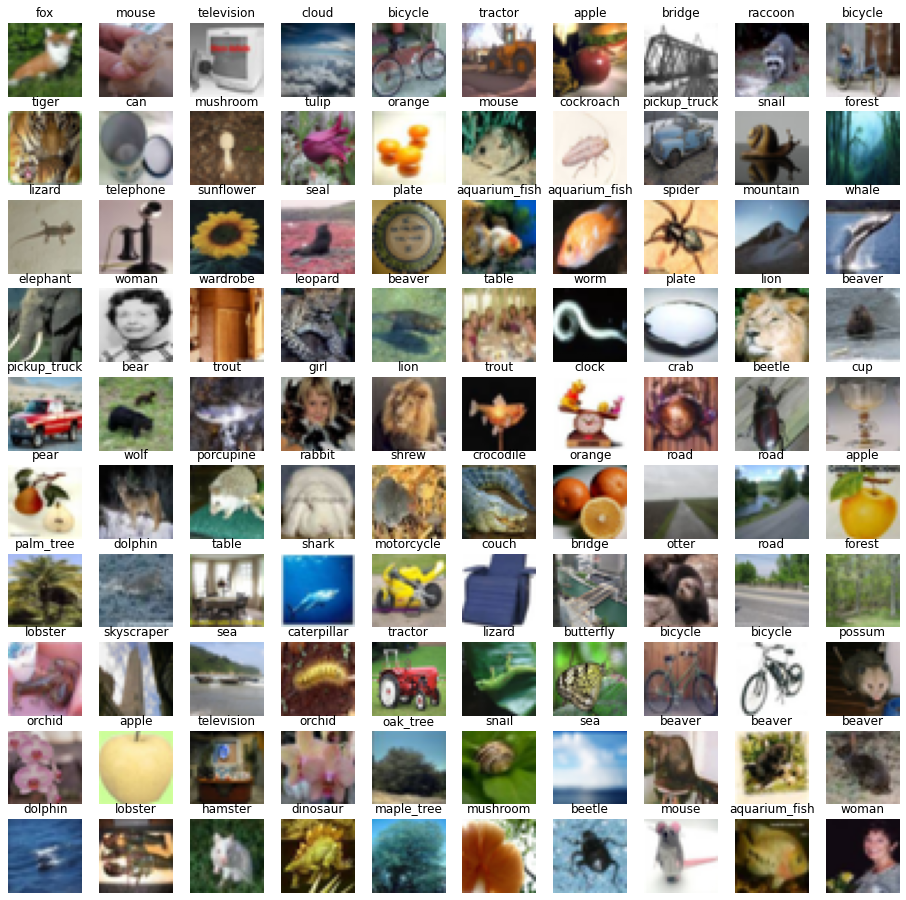

In [9]:
figure = plt.figure(figsize=(16, 16))
cols, rows = 10, 10
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    # IMPORTANT!!
    # PyTorch의 ToTensor transform은 channel first 방식임으로 채널을 마지막으로 배치해야 함
    # 자세한 내용은 다음 강좌에서 설명
    img = img.permute(1, 2, 0)
    figure.add_subplot(rows, cols, i)
    plt.title(meta_data['fine_label_names'][label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

### 2. Creating a Custom Dataset

- 사용자 지정 데이터셋 클래스는 __init__, __len__ 및 __getitem__의 세 가지 함수를 구현

#### (1) Overview

In [10]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

####(2) __init__

- __init__ 함수는 Dataset 객체를 인스턴스화할 때 한 번 실행
- 이미지, 주석 파일 및 두 변환이 포함된 디렉토리를 초기화
- 데이터 셋에서 수행해야 하는 기능들 추가 가능



```python
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
```



#### (3) __len__

- 샘플의 갯수를 반환



```python
def __len__(self):
    return len(self.img_labels)
```



#### (4) __getitem__

- __getitem__ 함수가 주어진 인덱스 idx에서 데이터 세트에서 샘플을 로드하고 반환
- 인덱스를 기반으로 디스크에서 이미지의 위치를 식별
- read_image를 사용하여 텐서로 변환
- self.img_labels의 csv 데이터에서 해당 레이블을 검색
- 해당하는 경우 transform 함수를 호출
- 텐서 이미지와 해당 레이블을 튜플로 반환합니다.
- Dataset에서 핵심 부분이며, 데이터를 호출 할때 특정 동작(자료형을 바꾸거나, 데이터에 대한 조작을 수행) 수행 가능



```python
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label
```



#### (5) Make my Own dataset

In [11]:
import numpy as np

data = dict()
data['x'] = np.random.rand(1000, 32, 32)
data['y'] = np.random.randint(10, size=1000)

In [12]:
class MyDataset(Dataset):
    def __init__(self, raw_data):
      self.x = torch.from_numpy(raw_data['x'])
      self.y =  torch.from_numpy(raw_data['y'])

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
      print(idx)
      return self.x[idx], self.y[idx]

In [13]:
class MyDataset2(Dataset):
    def __init__(self, raw_data):
      self.x = torch.from_numpy(raw_data['x'])
      self.y =  torch.from_numpy(raw_data['y'])

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
      print(idx)
      return self.x[idx], self.y[idx], len(self.y)

In [14]:
my_dataset = MyDataset(data)
for x, y in my_dataset:
  print(x, y)
  break

0
tensor([[0.8678, 0.1396, 0.7139,  ..., 0.3998, 0.8631, 0.0525],
        [0.5307, 0.4769, 0.8966,  ..., 0.5149, 0.8696, 0.9072],
        [0.1958, 0.8235, 0.5793,  ..., 0.4346, 0.5332, 0.9243],
        ...,
        [0.9129, 0.4237, 0.4839,  ..., 0.1450, 0.5587, 0.3502],
        [0.4462, 0.0248, 0.8312,  ..., 0.9834, 0.3645, 0.8953],
        [0.3300, 0.2912, 0.8076,  ..., 0.3744, 0.1397, 0.2440]],
       dtype=torch.float64) tensor(4)


In [15]:
my_dataset2 = MyDataset2(data)
for x, y, z in my_dataset2:
  print(x, y, z)
  break

0
tensor([[0.8678, 0.1396, 0.7139,  ..., 0.3998, 0.8631, 0.0525],
        [0.5307, 0.4769, 0.8966,  ..., 0.5149, 0.8696, 0.9072],
        [0.1958, 0.8235, 0.5793,  ..., 0.4346, 0.5332, 0.9243],
        ...,
        [0.9129, 0.4237, 0.4839,  ..., 0.1450, 0.5587, 0.3502],
        [0.4462, 0.0248, 0.8312,  ..., 0.9834, 0.3645, 0.8953],
        [0.3300, 0.2912, 0.8076,  ..., 0.3744, 0.1397, 0.2440]],
       dtype=torch.float64) tensor(4) 1000


### 3. Data Loader

#### (1) Setting the DataLoader

In [16]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#### (2) Iterate through the DataLoader

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


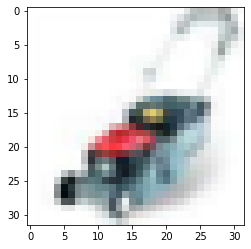

Label: lawn_mower


In [17]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
# IMPORTANT!!
# PyTorch의 ToTensor transform은 channel first 방식임으로 채널을 마지막으로 배치해야 함
# 자세한 내용은 다음 강좌에서 설명
img = img.permute(1, 2, 0)
plt.imshow(img)
plt.show()

print(f"Label: {meta_data['fine_label_names'][label]}")

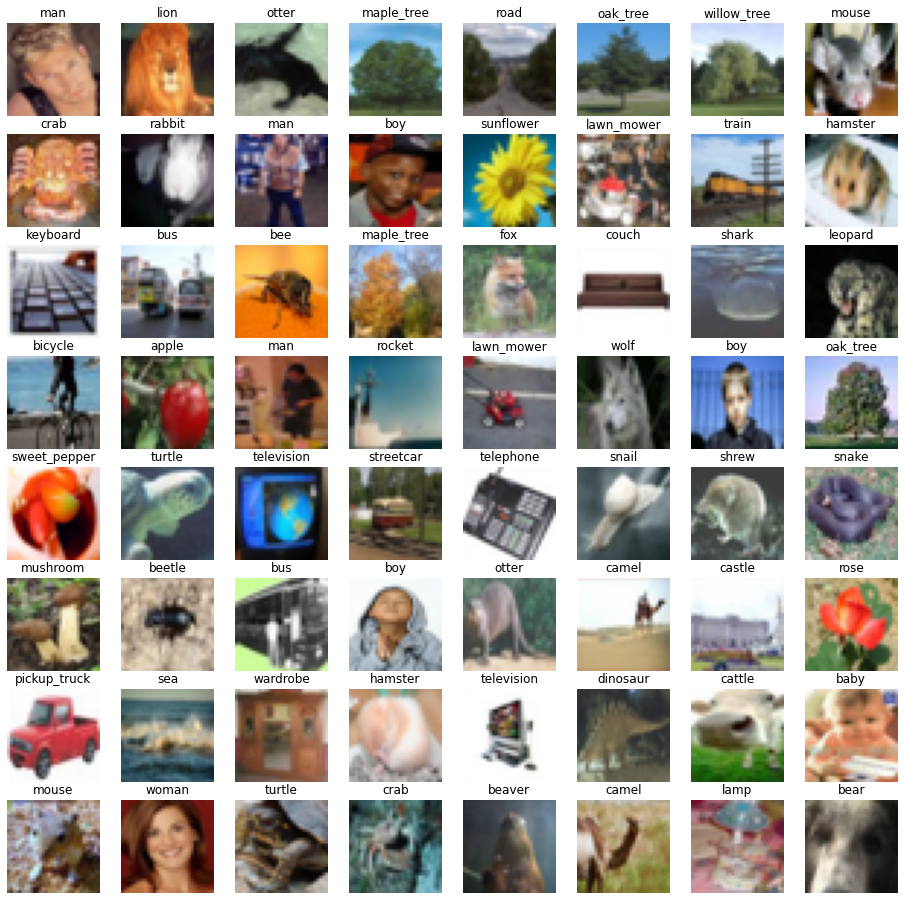

In [18]:
for features, labels in train_dataloader:
  figure = plt.figure(figsize=(16, 16))
  cols, rows = 8, 8
  for i in range(0, cols * rows):
    # IMPORTANT!!
    # PyTorch의 ToTensor transform은 channel first 방식임으로 채널을 마지막으로 배치해야 함
    # 자세한 내용은 다음 강좌에서 설명
    img = features[i].permute(1, 2, 0)
    label = labels[i]
    figure.add_subplot(rows, cols, i+1)
    plt.title(meta_data['fine_label_names'][label])
    plt.axis("off")
    plt.imshow(img)
  plt.show()
  break